In [17]:
import pandas as pd

# Load pre-COVID and post-COVID data
pre_covid_data = pd.read_csv('pre_covid_data(1).csv')
post_covid_data = pd.read_csv('covid_data(1).csv')

# Combine the data for a unified analysis
data = pd.concat([pre_covid_data, post_covid_data])

# Display the first few rows of the combined data
print(data.head())

                        App Name        Category  Rating  Reviews        Size  \
0  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
1  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
2  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
3  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   
4  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260  25000000.0   

   Installs  Type  Price Content Rating                   Genres  ...  \
0    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
1    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
2    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
3    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   
4    500000  Free    0.0       Everyone  Art & Design;Creativity  ...   

    Android Ver                                  Translated_Review Sentime

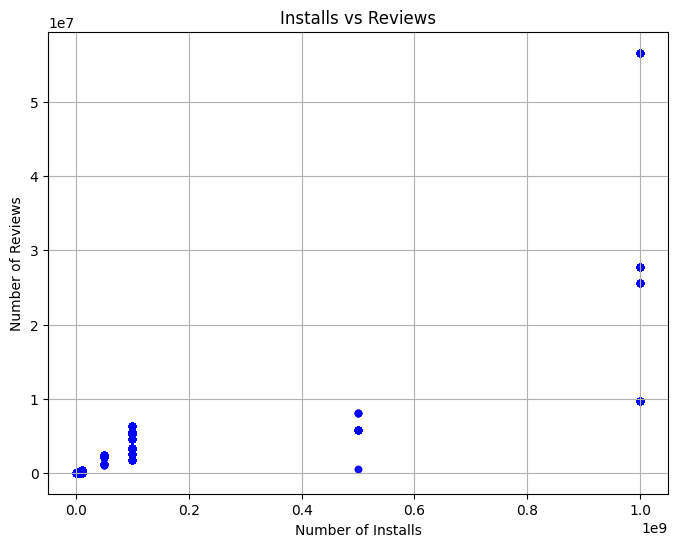

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Scatter plot of Installs vs Reviews
plt.figure(figsize=(8, 6))
plt.scatter(data['Installs'], data['Reviews'], s=20, c='blue', marker='o', alpha=0.4)
plt.title('Installs vs Reviews')
plt.xlabel('Number of Installs')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


The first scatter plot (Installs vs Reviews) visualizes how the number of installs relates to the number of reviews an app receives. This helps us see if there's a correlation between popularity (installs) and user engagement (reviews).

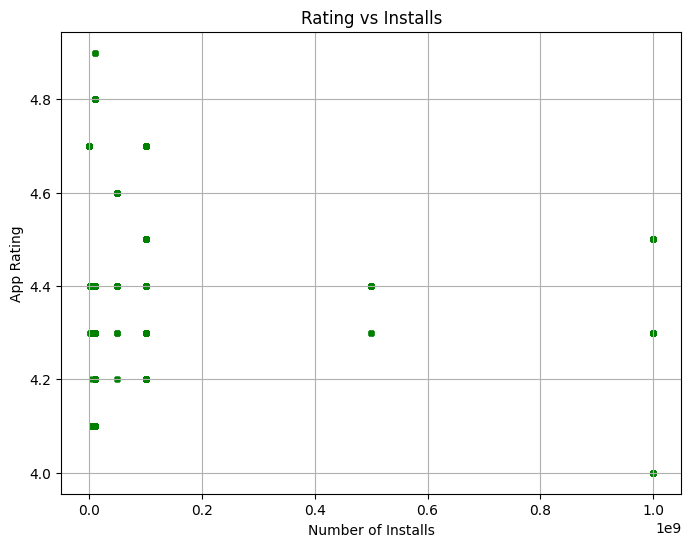

In [40]:
# 2. Scatter plot of Rating vs Installs

plt.figure(figsize=(8, 6))
plt.scatter(data['Installs'], data['Rating'], s=10, c='green', marker='s', alpha=0.4)
plt.title('Rating vs Installs')
plt.xlabel('Number of Installs')
plt.ylabel('App Rating')
plt.grid(True)
plt.show()


The second scatter plot (Rating vs Installs) examines how app ratings are distributed based on the number of installs. This plot helps us understand if highly installed apps tend to have higher ratings or if there's no clear relationship.

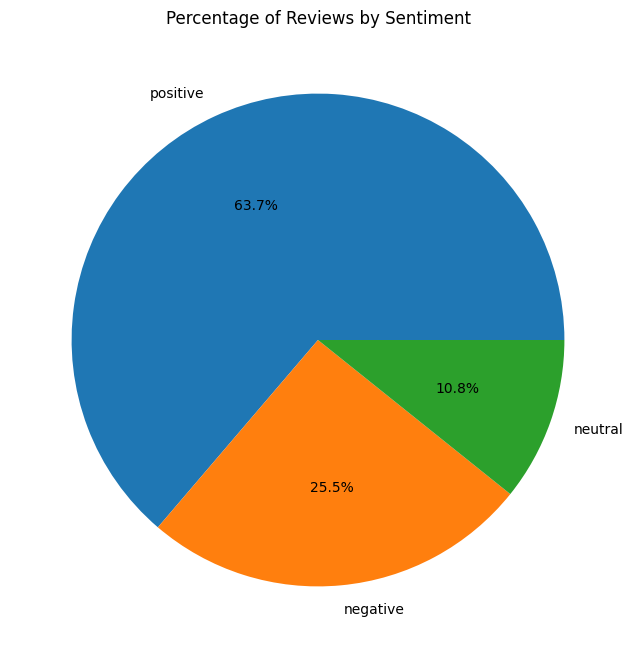

In [21]:
# 3. Percentage of Reviews based on Sentiment
sentiment_counts = data['sentiment'].value_counts(normalize=True) * 100
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage of Reviews by Sentiment')
plt.ylabel('')
plt.show()

The pie chart displays the distribution of reviews based on sentiment (Sentiment). It shows the percentage of reviews categorized as positive, negative, or neutral, providing insights into user sentiment towards the apps.

## Calculating Percentage of Users who Left Reviews

In [42]:
def calculate_review_percentage(data):
    # Calculate total installs
    total_installs = data['Installs'].sum()
    
    # Calculate total reviews
    total_reviews = data['Reviews'].sum()
    
    # Calculate percentage of users who left reviews
    review_percentage = (total_reviews / total_installs) * 100
    
    return review_percentage

In [43]:
# Calculate the percentage of users who left reviews
percentage_reviews = calculate_review_percentage(data)

# Print the result
print(f"Percentage of users who left reviews: {percentage_reviews:.2f}%")


Percentage of users who left reviews: 4.73%


calculate_review_percentage(data) function calculates:
* total_installs: Sum of all installs across all apps.
* total_reviews: Sum of all reviews across all apps.
* review_percentage: Percentage of users who left reviews, calculated as (total_reviews / total_installs) * 100.


This means that out of all the users who installed the apps in the dataset, about 4.73% of them also left a review. This metric provides insight into user engagement and can be used to gauge how actively users provide feedback after installing an app.

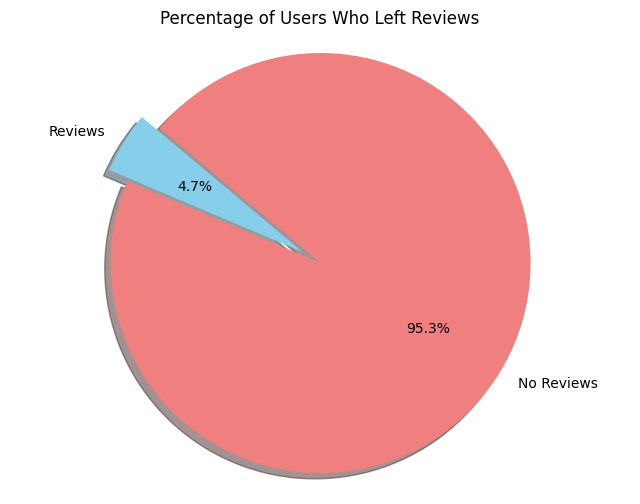

In [46]:
# Pie Chart
labels = ['Reviews', 'No Reviews']
sizes = [percentage_reviews, 100 - percentage_reviews]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0) # explode the first slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Users Who Left Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
